# CNN

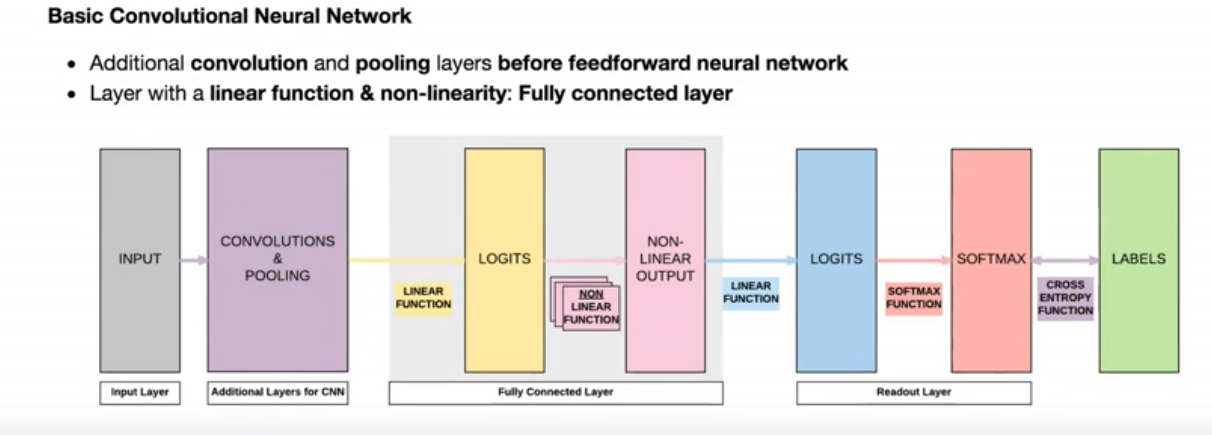

In [33]:
from IPython.display import Image
Image(filename='1.png')

# ONE Convolution layer

input depth=1 one convolution layer

single color

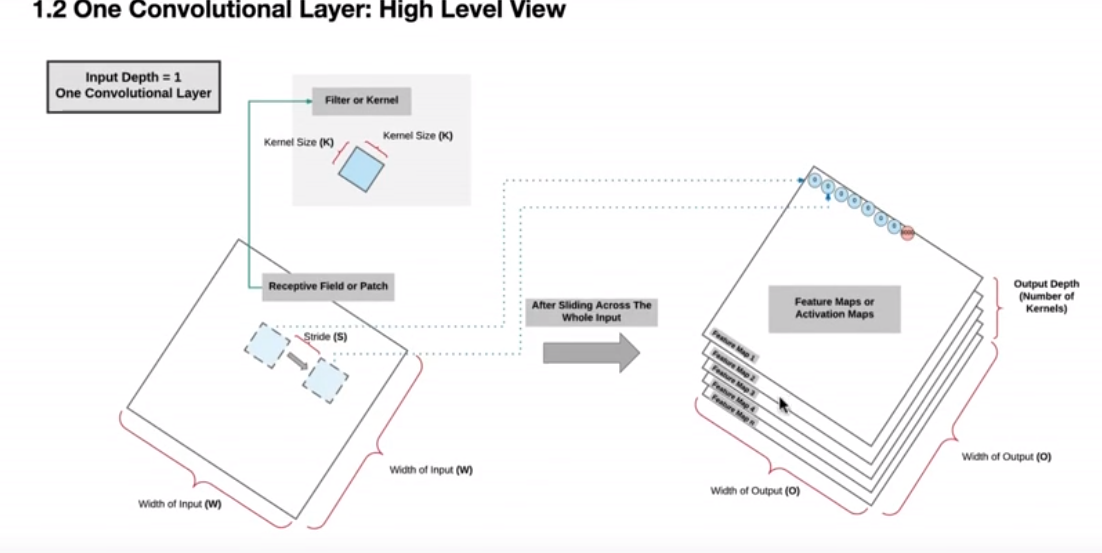

In [34]:
from IPython.display import Image
Image(filename='2.png')

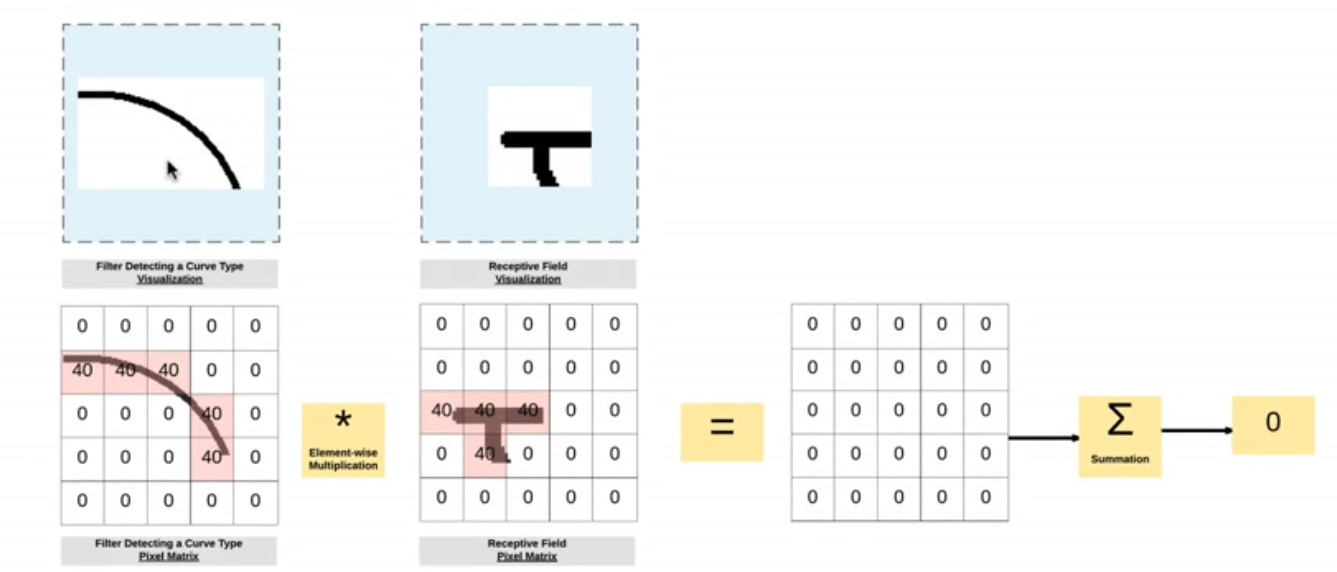

In [35]:
from IPython.display import Image
Image(filename='3.png')

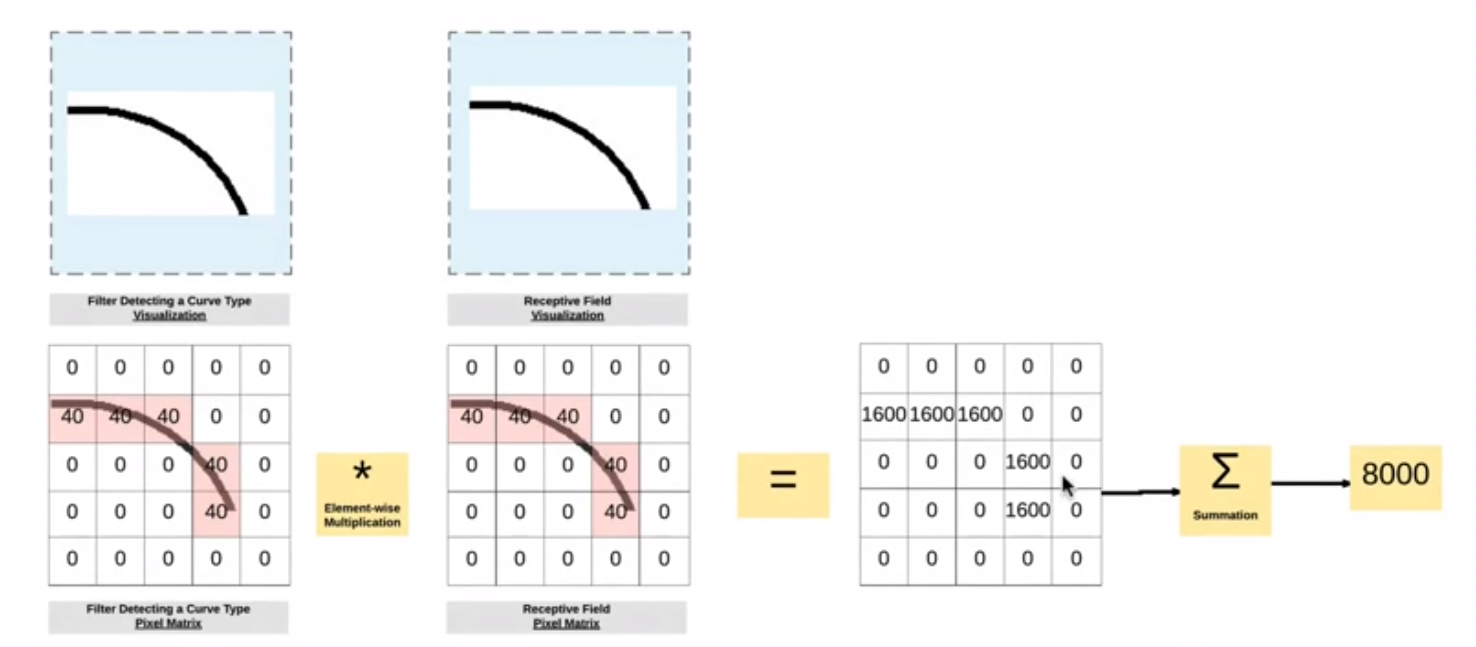

In [36]:
# we will get all 0s  until we get the filter kernal
from IPython.display import Image
Image(filename='4.png')

#the kernal detecting the particular shape 

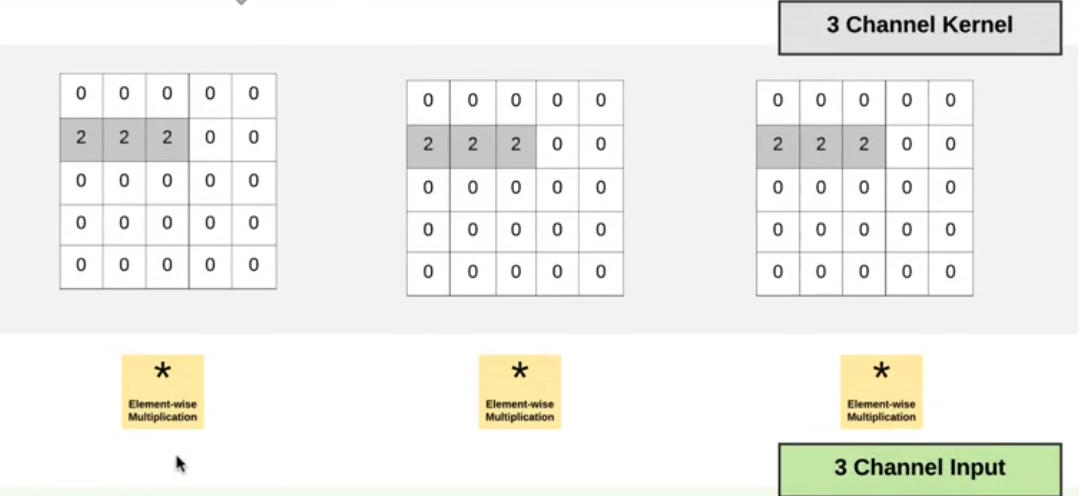

In [37]:
from IPython.display import Image
Image(filename='6.png')

we have depth of 3 this time and each 5 by 5 matric is one layer 

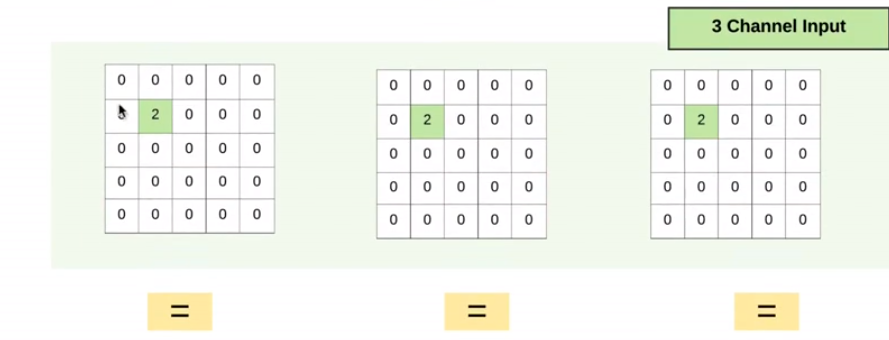

In [38]:
from IPython.display import Image
Image(filename='7.png')

These three are receptive fileds

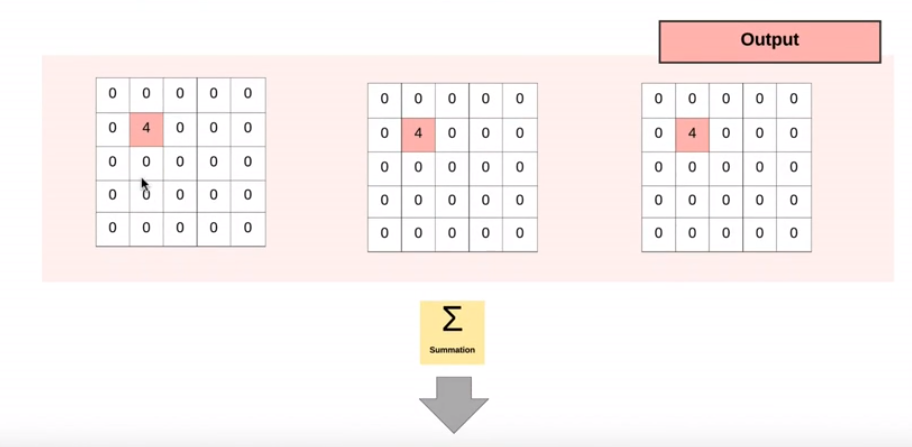

In [39]:
from IPython.display import Image
Image(filename='8.png')

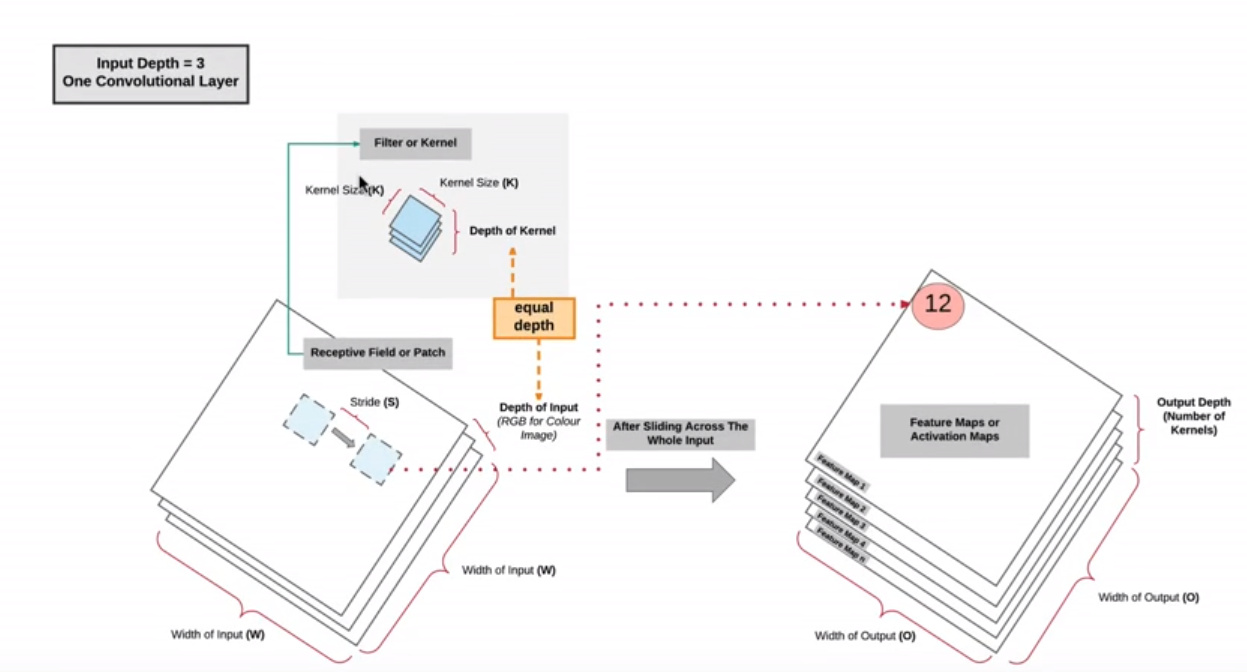

In [40]:
from IPython.display import Image
Image(filename='5.png')

In [41]:
# do it multiple times for different filter kernal and get different feature maps.


# as the kernal is sliding across 2 operations per patch
# 1 element wise multiplication
# summation

#more kernels=more feature map channels  
# to capture more information of input

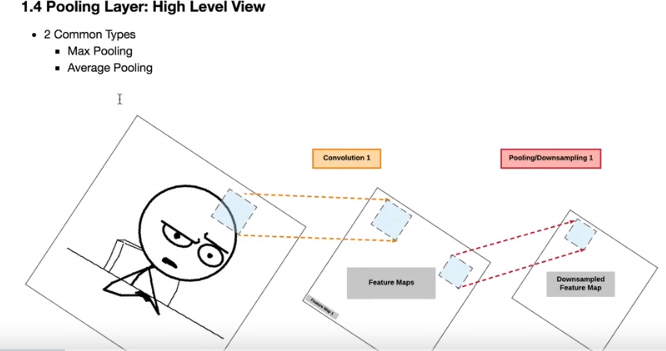

In [42]:
from IPython.display import Image
Image(filename='9.png')

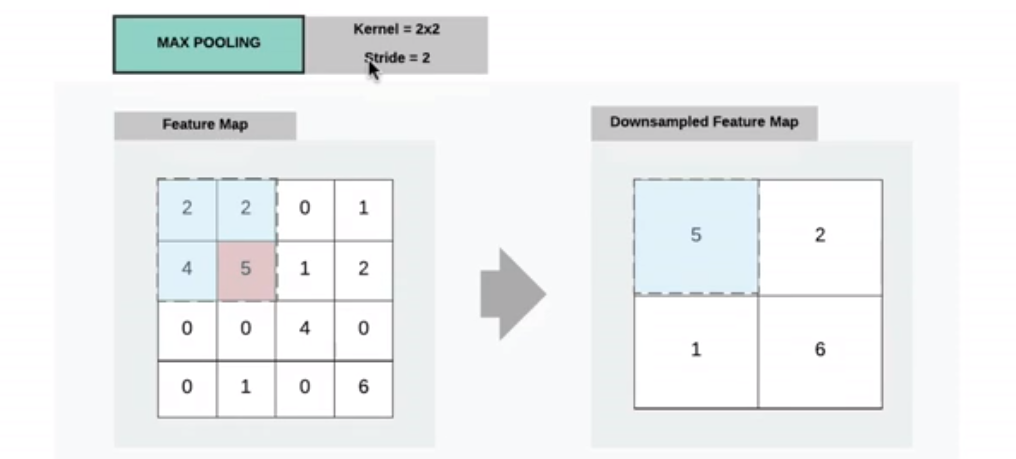

In [43]:
from IPython.display import Image
Image(filename='10.png')

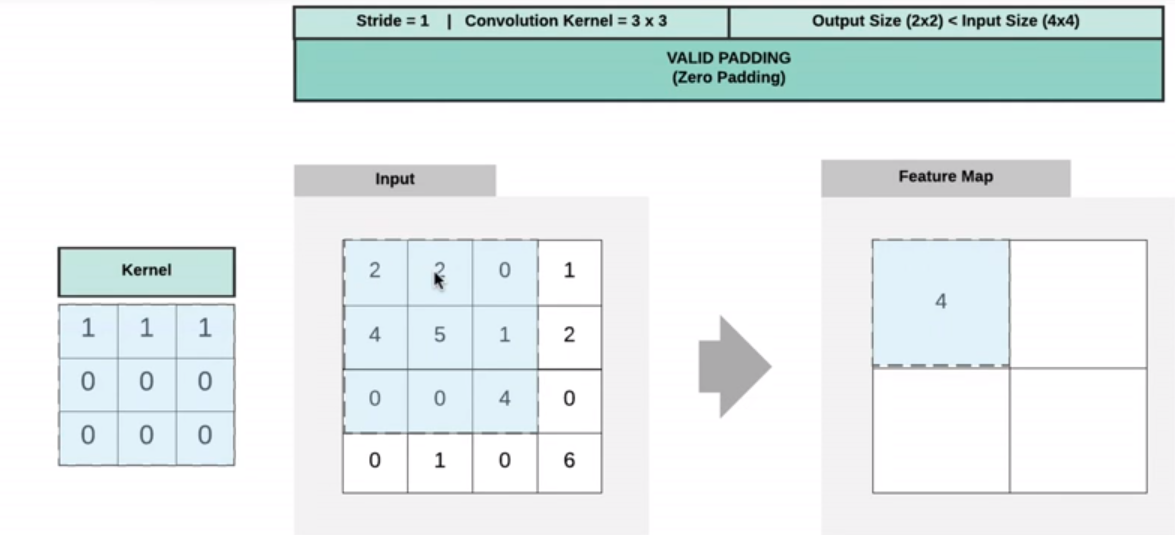

In [44]:
from IPython.display import Image
Image(filename='11.png')

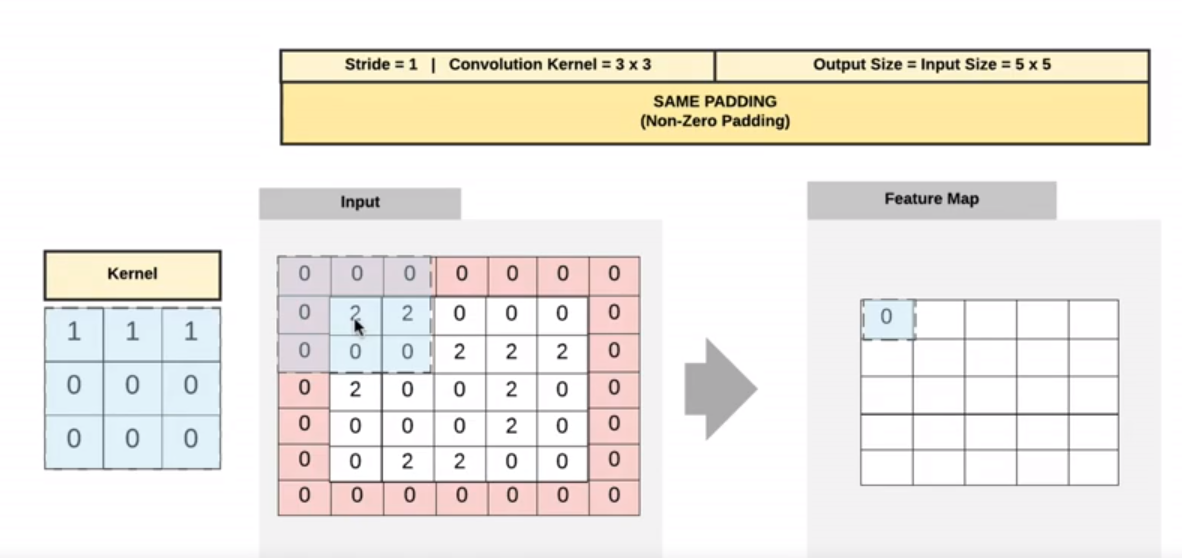

In [45]:
from IPython.display import Image
Image(filename='12.png')

padding 

evertime valid padding(no padding)

output_size<input_size

same padding

output_size=inputsize

# Dimension calculation

o=(w-k+2p)/s +1

o:output height
    
w:input height

k:filter size

P:same padding
    p=(k-1)/2
    zero padding
    p=0
S:stride

# A conv+2maxpool same padding

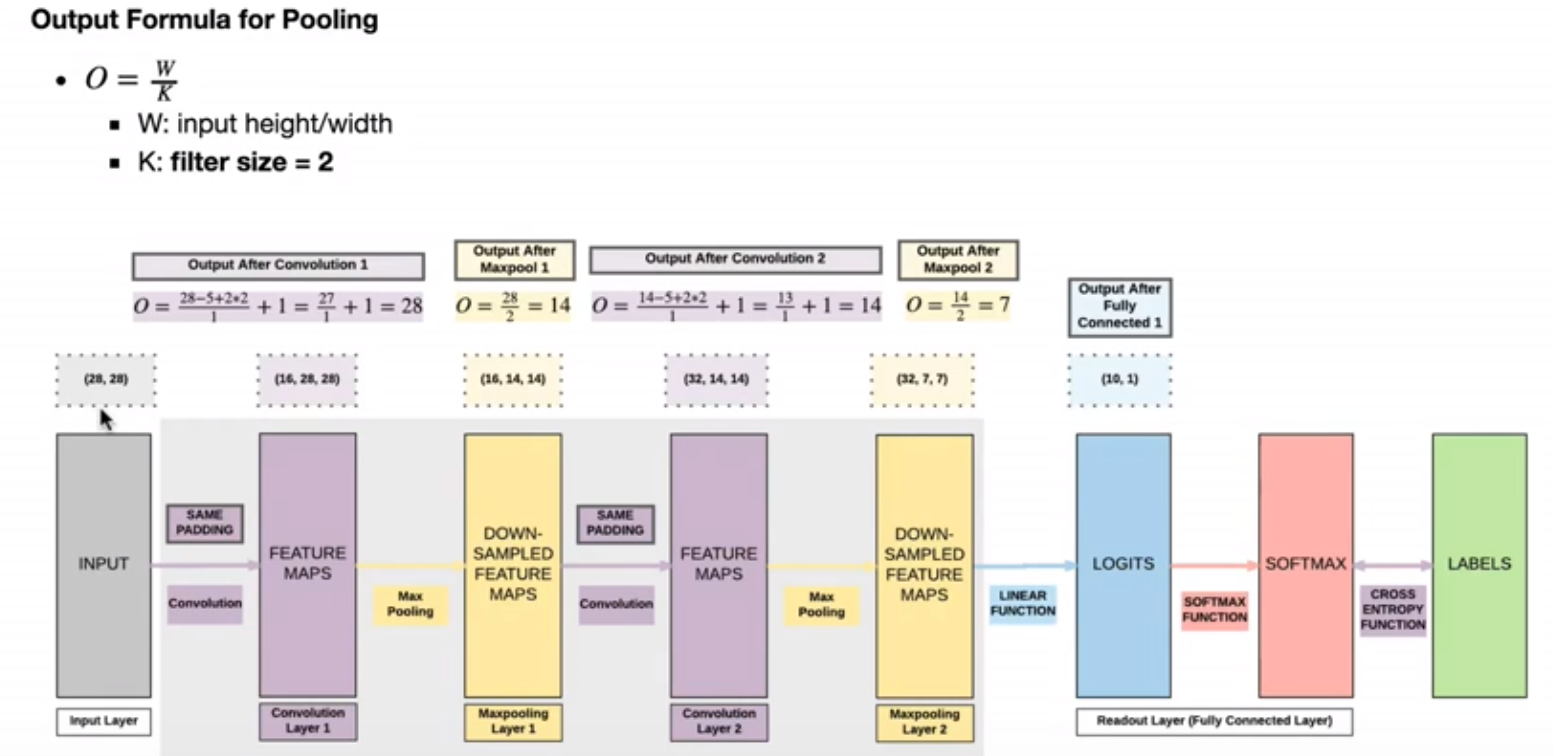

In [46]:
from IPython.display import Image
Image(filename='14.png')

In [47]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [48]:
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

In [49]:
print(train_dataset.train_data.size())

torch.Size([60000, 28, 28])


In [50]:
print(train_dataset.train_labels.size())

torch.Size([60000])


In [51]:
print(test_dataset.test_data.size())

torch.Size([10000, 28, 28])


In [52]:
print(test_dataset.test_labels.size())

torch.Size([10000])


In [53]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [54]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        # Convolution 2 the in_channels has to be the same with convoultion 1 out_chanels which means we have 16 feture maps get 
        #fed into here 2 32 are kernals we dicided.
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(32 * 7 * 7, 10)
        
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2
        out = self.maxpool2(out)
        
        # Resize
        # Original size: (100, 32, 7, 7)
        # out.size(0): 100
        # New out size: (100, 32*7*7)
        
        
        # we need to resize it in CNN 
        out = out.view(out.size(0), -1)
        # Linear function (readout)
        out = self.fc1(out)
        
        return out

In [55]:
model = CNNModel()

In [56]:

criterion = nn.CrossEntropyLoss()


In [57]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [58]:
print(model.parameters())

print(len(list(model.parameters())))

# Convolution 1: 16 Kernels
print(list(model.parameters())[0].size())

# Convolution 1 Bias: 16 Kernels
print(list(model.parameters())[1].size())

# Convolution 2: 32 Kernels with depth = 16
print(list(model.parameters())[2].size())

# Convolution 2 Bias: 32 Kernels with depth = 16
print(list(model.parameters())[3].size())

# Fully Connected Layer 1
print(list(model.parameters())[4].size())

# Fully Connected Layer Bias
print(list(model.parameters())[5].size())

<generator object Module.parameters at 0x000001D44D899ED0>
6
torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([10, 1568])
torch.Size([10])


In [59]:
#CNN input :(1:28,28)
#feedfoward NN input:(1,28*28)


iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = Variable(images)
        labels = Variable(labels)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = Variable(images)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
                accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

C:\Users\G2945\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Iteration: 500. Loss: 0.37863022089004517. Accuracy: 89
Iteration: 1000. Loss: 0.2017839103937149. Accuracy: 92
Iteration: 1500. Loss: 0.14640142023563385. Accuracy: 94
Iteration: 2000. Loss: 0.1988595426082611. Accuracy: 95
Iteration: 2500. Loss: 0.14470285177230835. Accuracy: 96
Iteration: 3000. Loss: 0.08880949020385742. Accuracy: 97


# Model B samepooling average pool

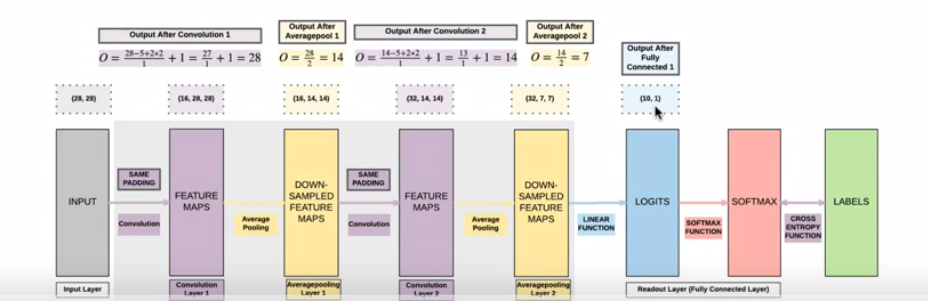

In [60]:
from IPython.display import Image
Image(filename='15.png')

#####  just change the maximum pooling to average pooling

In [61]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)
'''
STEP 3: CREATE MODEL CLASS
'''
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        
        # Average pool 1
        self.avgpool1 = nn.AvgPool2d(kernel_size=2)
        
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()
        
        # Average pool 2
        self.avgpool2 = nn.AvgPool2d(kernel_size=2)
        
        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Average pool 1
        out = self.avgpool1(out)
        
        # Convolution 2
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2
        out = self.avgpool2(out)
        
        # Resize
        # Original size: (100, 32, 7, 7)
        # out.size(0): 100
        # New out size: (100, 32*7*7)
        out = out.view(out.size(0), -1)
        
        # Linear function (readout)
        out = self.fc1(out)
        
        return out
    
'''
STEP 4: INSTANTIATE MODEL CLASS
'''

model = CNNModel()

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = Variable(images)
        labels = Variable(labels)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = Variable(images)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                 # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

C:\Users\G2945\Anaconda3\lib\site-packages\ipykernel_launcher.py:153: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Iteration: 500. Loss: 0.6199783682823181. Accuracy: 84
Iteration: 1000. Loss: 0.35646679997444153. Accuracy: 89
Iteration: 1500. Loss: 0.3106616139411926. Accuracy: 90
Iteration: 2000. Loss: 0.3758385479450226. Accuracy: 91
Iteration: 2500. Loss: 0.159307599067688. Accuracy: 92
Iteration: 3000. Loss: 0.2840399444103241. Accuracy: 93


average pooling<maximum pooling

# Model C valid padding with max pooling

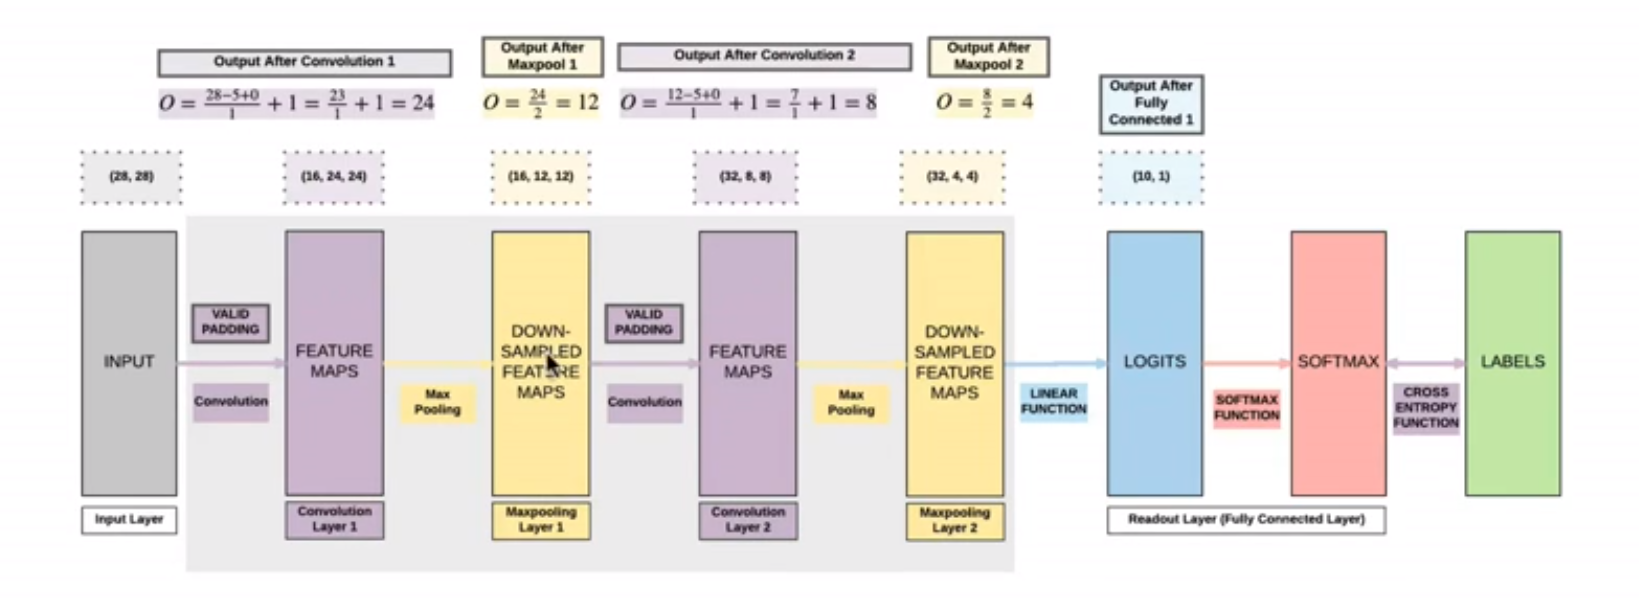

In [62]:
from IPython.display import Image
Image(filename='16.png')

In [63]:
# this model the downsampling effect is more aggresive 
# only need to change the  padding to 0

In [64]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)
'''
STEP 3: CREATE MODEL CLASS
'''
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(32 * 4 * 4, 10)
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2
        out = self.maxpool2(out)
        
        # Resize
        # Original size: (100, 32, 7, 7)
        # out.size(0): 100
        # New out size: (100, 32*7*7)
        out = out.view(out.size(0), -1)
        
        # Linear function (readout)
        out = self.fc1(out)
        
        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''

model = CNNModel()

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()

'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = Variable(images)
        labels = Variable(labels)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
           # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = Variable(images)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

C:\Users\G2945\Anaconda3\lib\site-packages\ipykernel_launcher.py:153: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Iteration: 500. Loss: 0.4137229025363922. Accuracy: 87
Iteration: 1000. Loss: 0.5559154748916626. Accuracy: 91
Iteration: 1500. Loss: 0.2755987048149109. Accuracy: 93
Iteration: 2000. Loss: 0.3528892993927002. Accuracy: 95
Iteration: 2500. Loss: 0.15310421586036682. Accuracy: 96
Iteration: 3000. Loss: 0.13462480902671814. Accuracy: 96


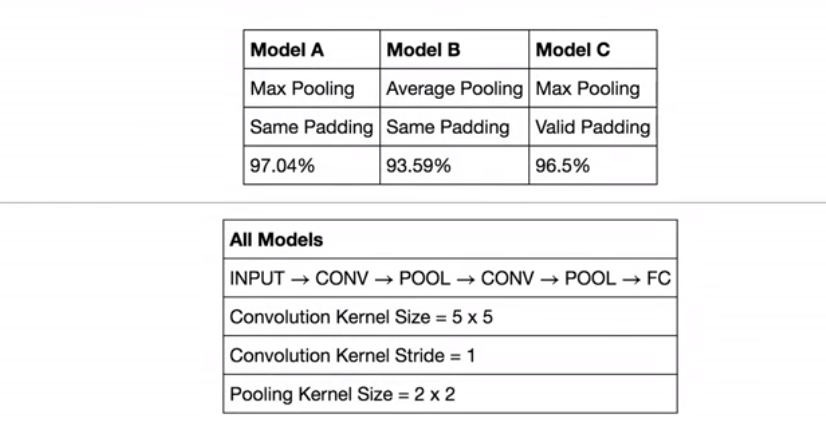

In [65]:
from IPython.display import Image
Image(filename='17.png')

# deeplearning

3 ways to expand CNN

 more convolution layers

 less agressive downsampling:
    smaller kernal size for pooling

more fully connected layers(more feedforward neural network)

# cpu to Gpu for model A

In [66]:
#model and variables
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        # Convolution 2 the in_channels has to be the same with convoultion 1 out_chanels which means we have 16 feture maps get 
        #fed into here 2 32 are kernals we dicided.
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(32 * 7 * 7, 10)
        
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2
        out = self.maxpool2(out)
        
        # Resize
        # Original size: (100, 32, 7, 7)
        # out.size(0): 100
        # New out size: (100, 32*7*7)
        
        
        # we need to resize it in CNN 
        out = out.view(out.size(0), -1)
        # Linear function (readout)
        out = self.fc1(out)
        
        return out
model = CNNModel()
if torch.cuda.is_available():
    model.cuda()
    
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
num_epochs=5
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images)
            labels = Variable(labels)
            
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    images = Variable(images.cuda())
                else: 
                    images = Variable(images)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

C:\Users\G2945\Anaconda3\lib\site-packages\ipykernel_launcher.py:141: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Iteration: 500. Loss: 0.3026854395866394. Accuracy: 88
Iteration: 1000. Loss: 0.25994837284088135. Accuracy: 92
Iteration: 1500. Loss: 0.16488032042980194. Accuracy: 95
Iteration: 2000. Loss: 0.11404979974031448. Accuracy: 95
Iteration: 2500. Loss: 0.12232545763254166. Accuracy: 96
Iteration: 3000. Loss: 0.15193934738636017. Accuracy: 96
